#Training Linear Regression Model

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures.

In [14]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#Linear Regression

In [15]:
import numpy as np
import pandas as pd

# X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)
from google.colab import files
uploaded  = files.upload()

import io
abalone = pd.read_csv(
    io.BytesIO(uploaded['abalone_train.csv']),
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

# X1 is 
#    0       0.435
#    1       0.585
#    2       0.655
#    .....
X1 = abalone["Length"]

# X2 is 
#    array([0.435, 0.585, ...., 0.45])
X2 = np.array(X1)

# X is 
#    array([[0.435],
#           [0.585],
#           [0.655],
#           ...,
#           [0.53 ],
#           [0.395],
#           [0.45 ]])
X = X2.reshape(-1, 1)

y1 = abalone["Height"]
y2 = np.array(y1)
y = y2.reshape(-1, 1)

Saving abalone_train.csv to abalone_train (1).csv


Saving figure generated_data_plot


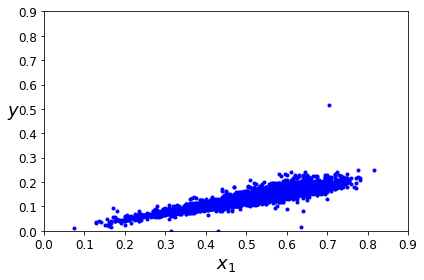

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 0.9, 0, 0.9])
save_fig("generated_data_plot")
plt.show()

In [17]:
X_b = np.c_[np.ones((3320, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
theta_best

array([[-0.0108267 ],
       [ 0.28716253]])

In [19]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[-0.0108267 ],
       [ 0.56349837]])

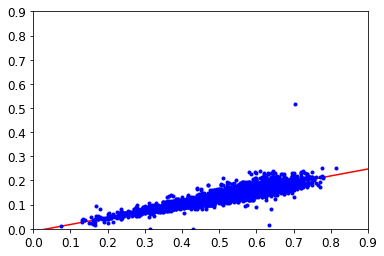

In [20]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 0.9, 0, 0.9])
plt.show()

Saving figure linear_model_predictions_plot


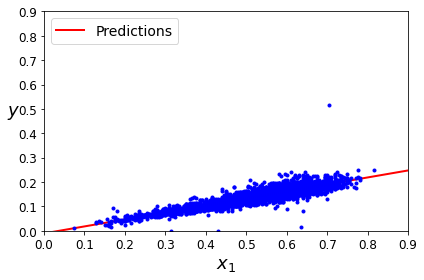

In [21]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 0.9, 0, 0.9])
save_fig("linear_model_predictions_plot")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.0108267]), array([[0.28716253]]))

In [23]:
lin_reg.predict(X_new)

array([[-0.0108267 ],
       [ 0.56349837]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [24]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[-0.0108267 ],
       [ 0.28716253]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [25]:
np.linalg.pinv(X_b).dot(y)

array([[-0.0108267 ],
       [ 0.28716253]])